### PGBM-001

flair shape: (22, 240, 240)
t1 shape: (22, 240, 240)
t1ce shape: (22, 240, 240)
t2 shape: (22, 240, 240)
mask shape: (22, 240, 240)


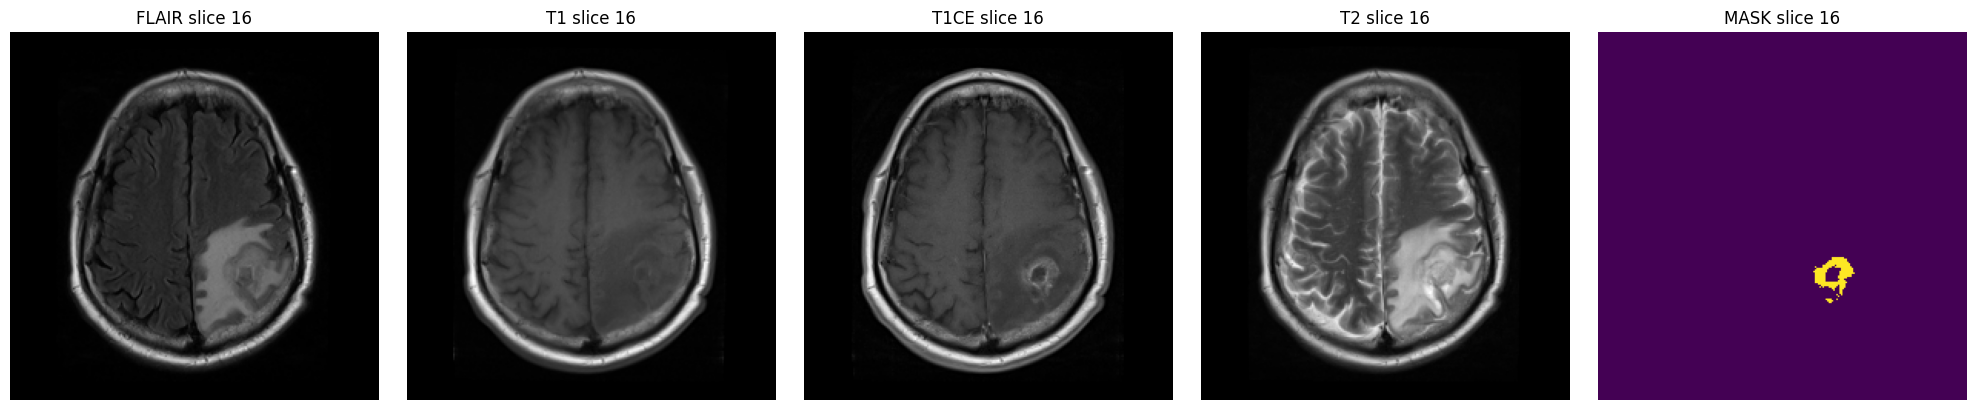

flair shape: (22, 240, 240)
t1 shape: (22, 240, 240)
t1ce shape: (22, 240, 240)
t2 shape: (22, 240, 240)
mask shape: (22, 240, 240)


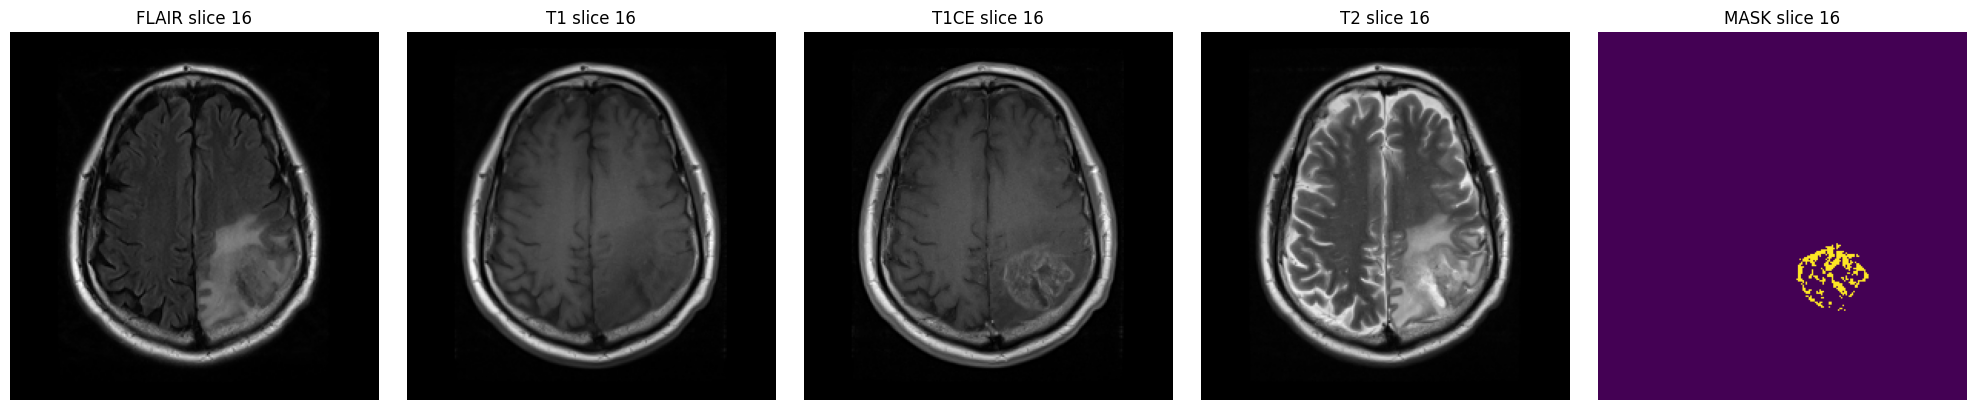

In [1]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_btp_case(preproc_root, case_id, date_folder=None, mods=None):
    """
    preproc_root: 전처리된 BTP 루트 폴더
    case_id:      'PGBM-001' 같은 케이스 이름
    date_folder:  날짜별 서브폴더. None이면 첫 번째 자동 선택
    mods:         ['flair','t1','t1ce','t2','mask'] 등 표시할 모달리티
    """
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]

    case_dir = os.path.join(preproc_root, case_id)
    dates = sorted(d for d in os.listdir(case_dir)
                   if os.path.isdir(os.path.join(case_dir, d)))
    if not dates:
        raise RuntimeError(f"No date folders under {case_dir}")
    if date_folder is None:
        date_folder = dates[0]
    if date_folder not in dates:
        raise ValueError(f"{date_folder!r} not in {dates}")

    in_dir = os.path.join(case_dir, date_folder)
    fpaths = {m: os.path.join(in_dir, f"{m}.nii.gz") for m in mods}

    # 1) 각 모달리티 shape 출력
    for m, p in fpaths.items():
        arr = nib.load(p).get_fdata()
        print(f"{m} shape: {arr.shape}")  # now (Z, Y, X)

    # 2) 마스크가 있는 Z 인덱스 찾기
    mask = nib.load(fpaths["mask"]).get_fdata()  # (Z, Y, X)
    zs = np.where(mask.sum(axis=(1,2)) > 0)[0]
    if len(zs) > 0:
        z0 = zs[len(zs)//2]
    else:
        z0 = mask.shape[0] // 2

    # 3) 시각화
    fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods), 4))
    for ax, m in zip(axs, mods):
        vol = nib.load(fpaths[m]).get_fdata()     # (Z, Y, X)
        slice_img = vol[z0, :, :]                 # pick axial slice at Z = z0

        ax.imshow(
            slice_img,
            cmap="gray" if m != "mask" else "viridis",
            aspect="equal"
        )
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# ─────────────────────────── 사용 예시 ───────────────────────────
preproc_root = "../data/btp_preproc_fixed22"
case_id      = "PGBM-001"
show_btp_case(preproc_root, case_id,
              date_folder="1991-11-19")

show_btp_case(preproc_root, case_id,
              date_folder="1992-04-02")

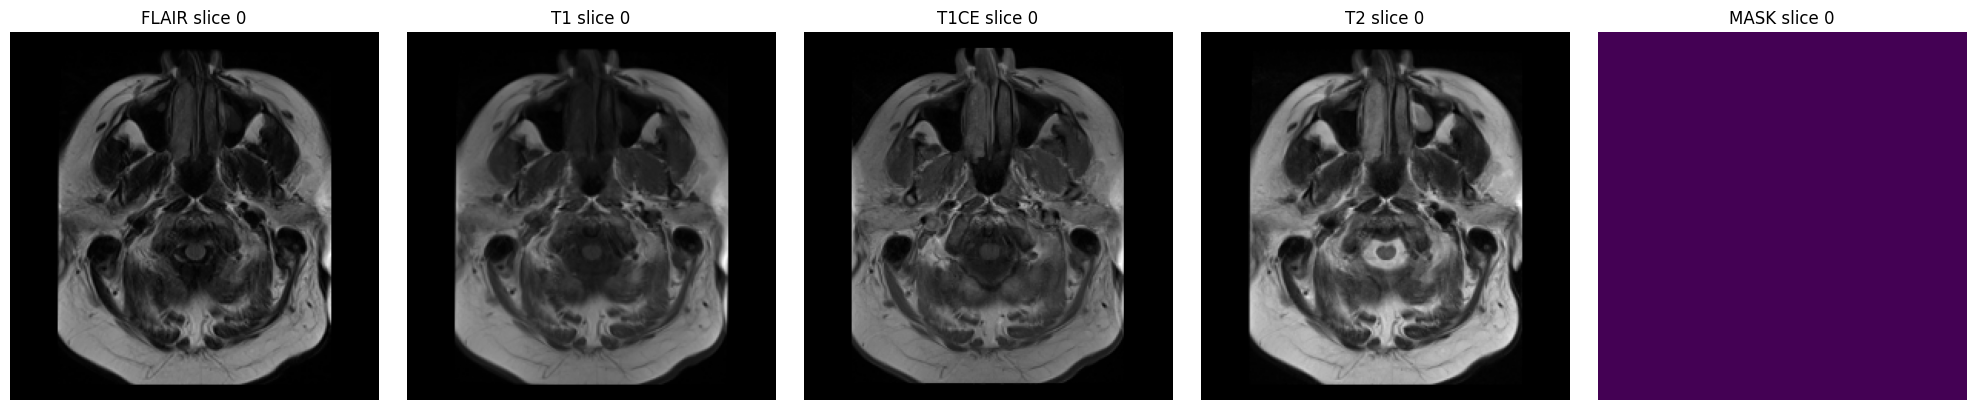

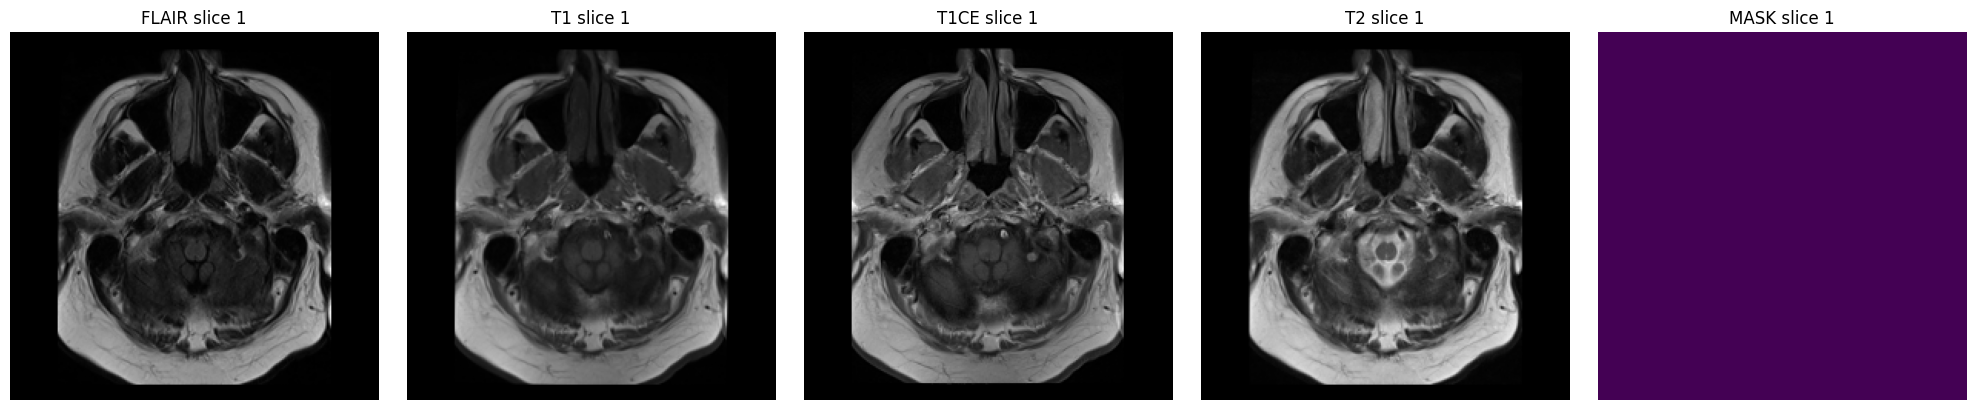

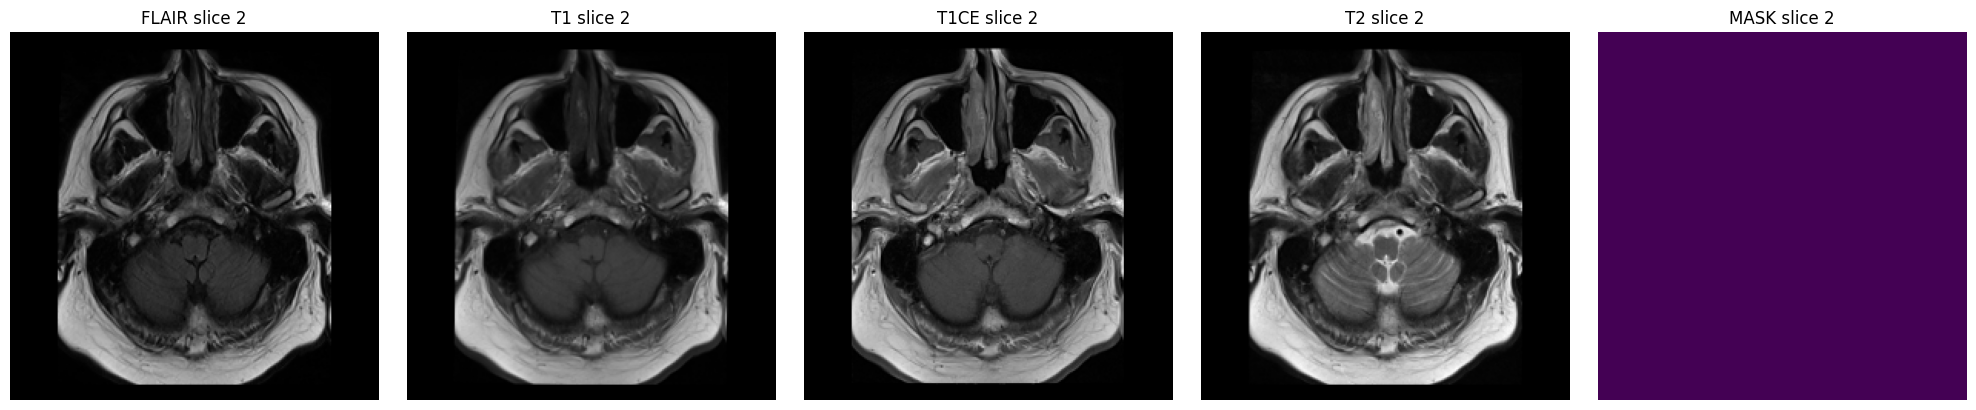

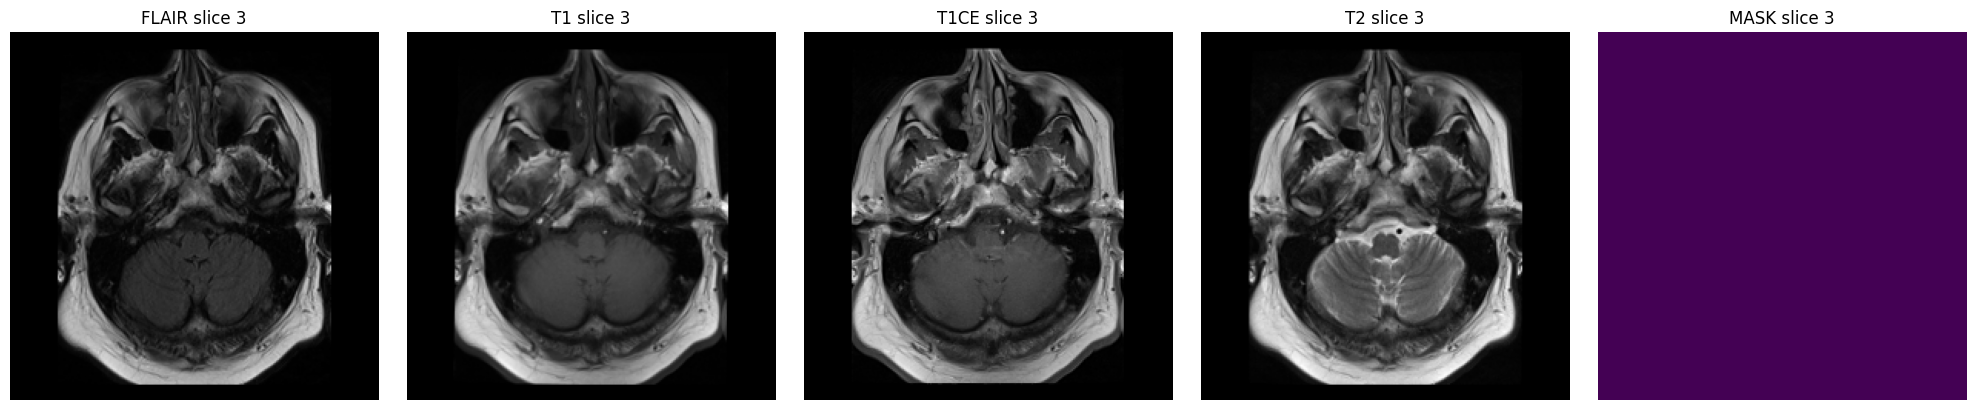

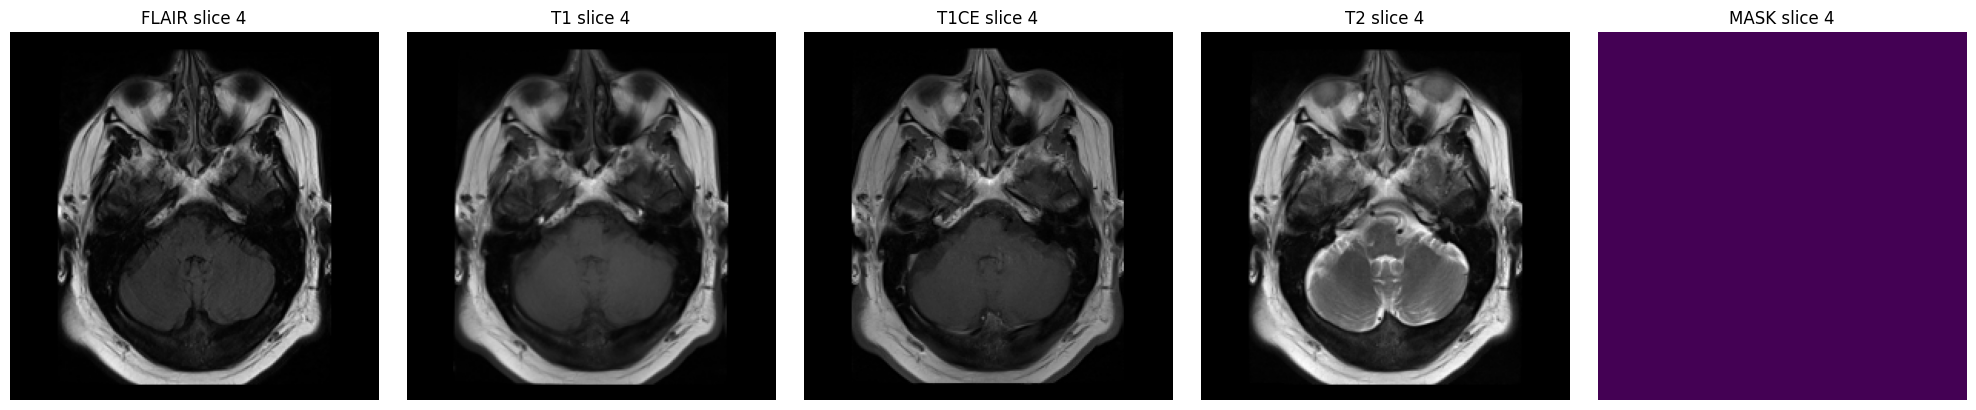

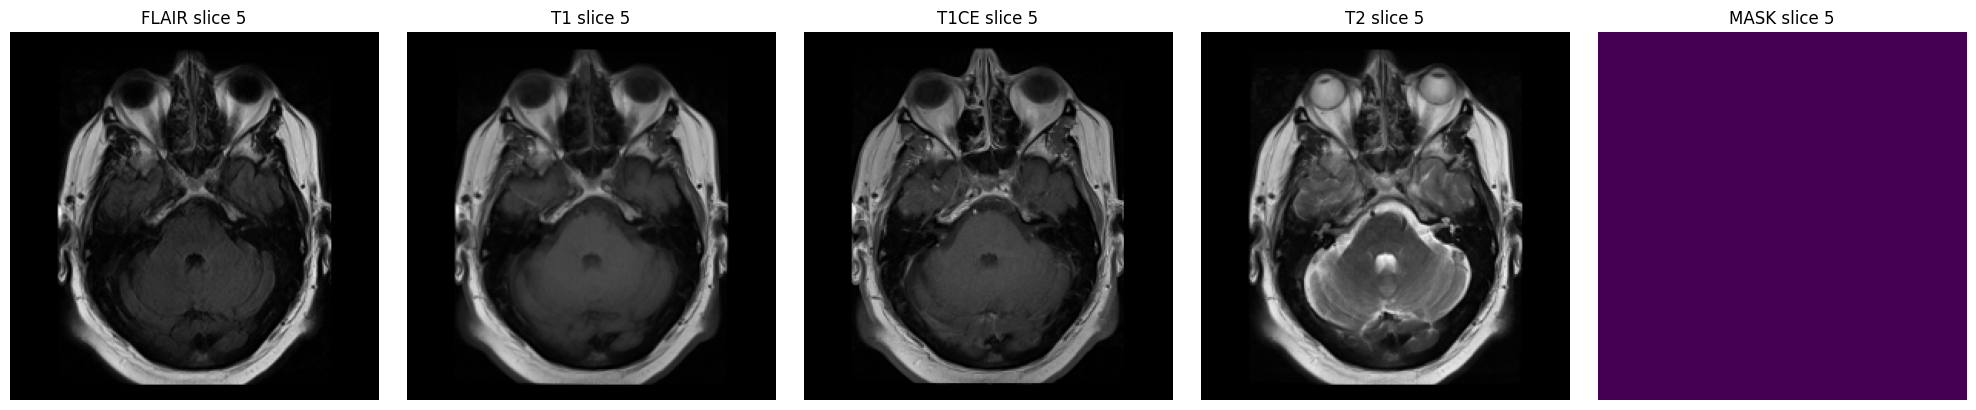

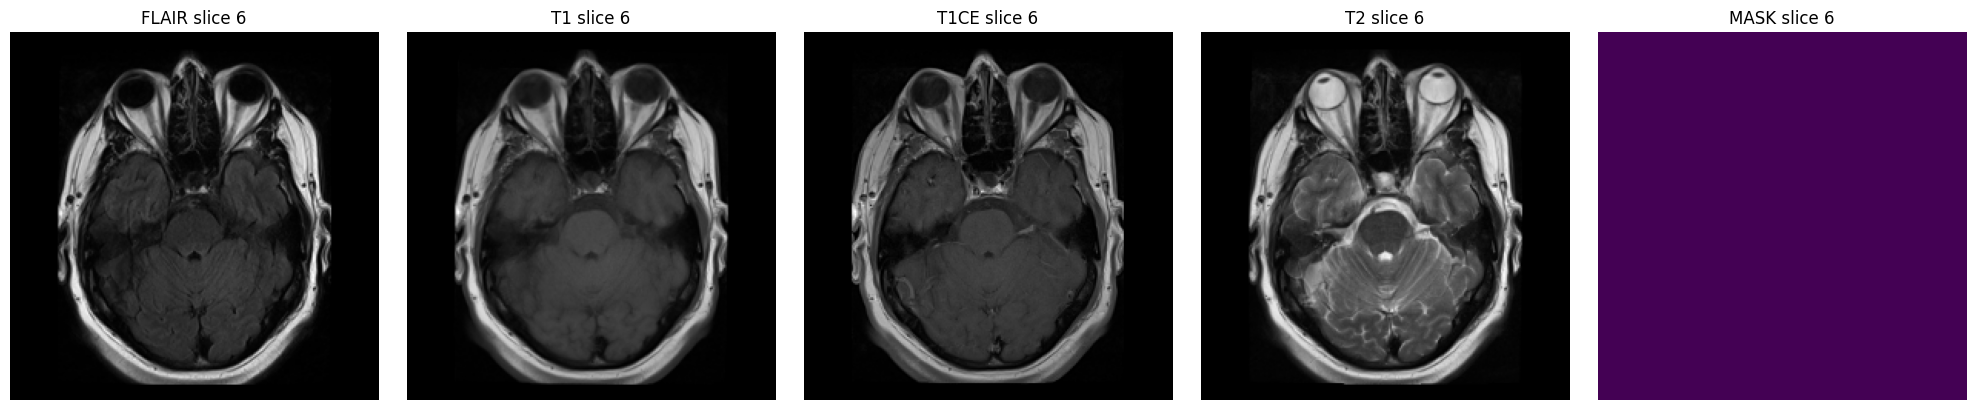

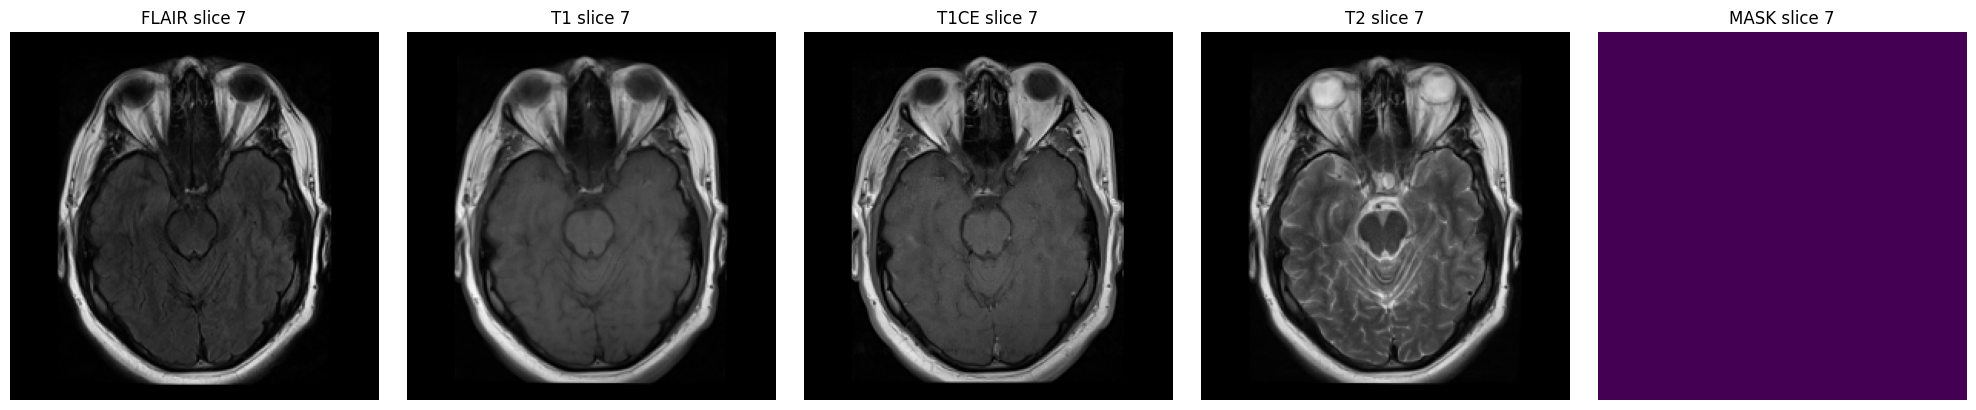

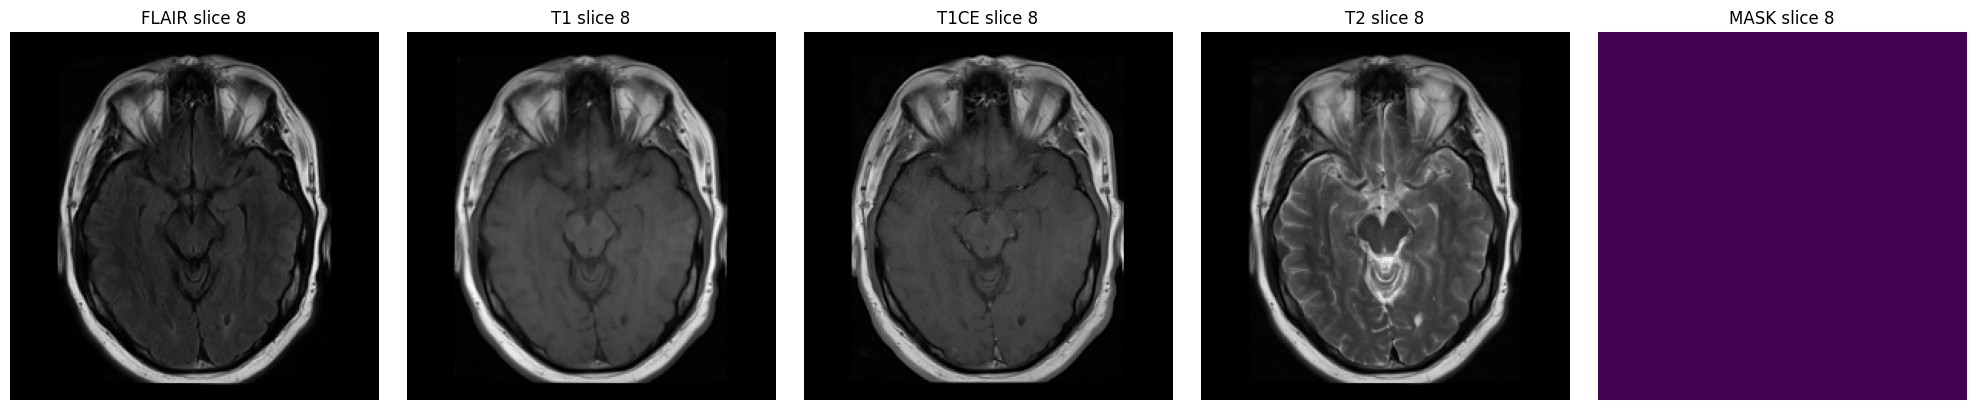

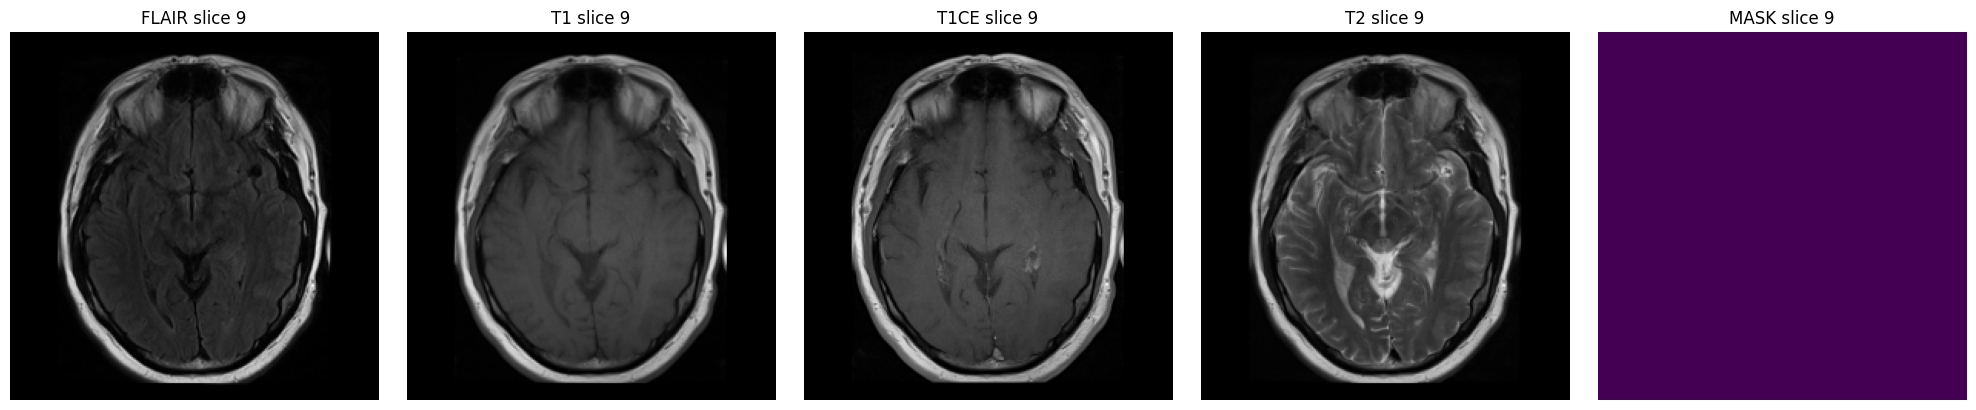

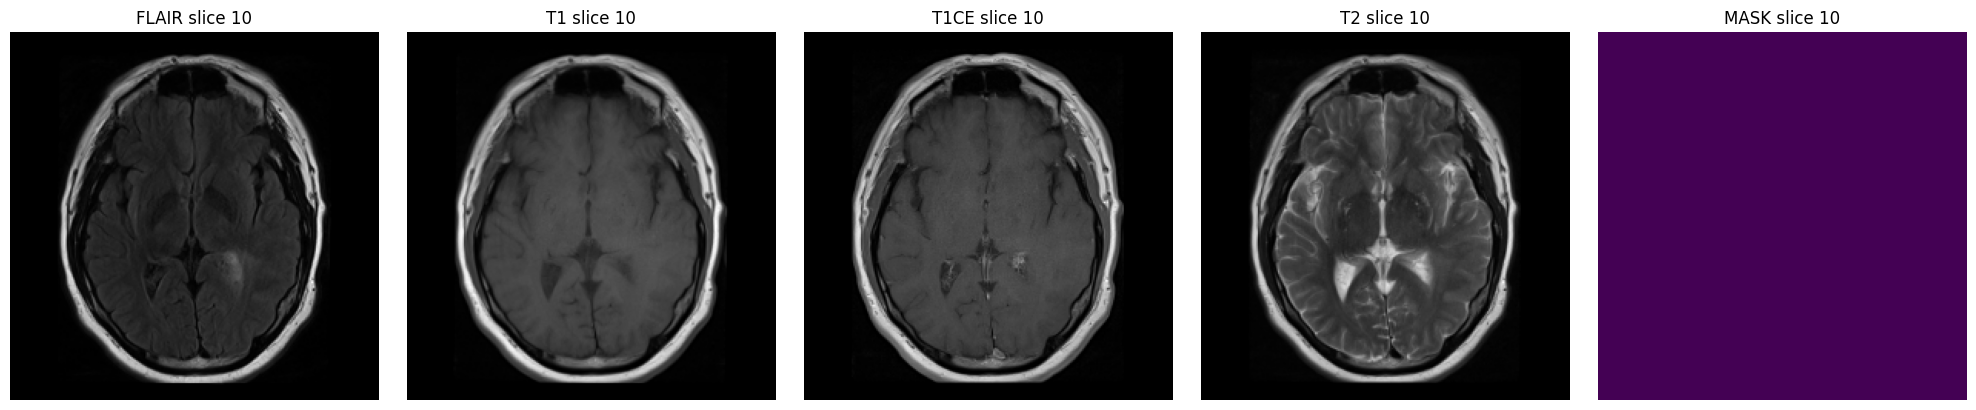

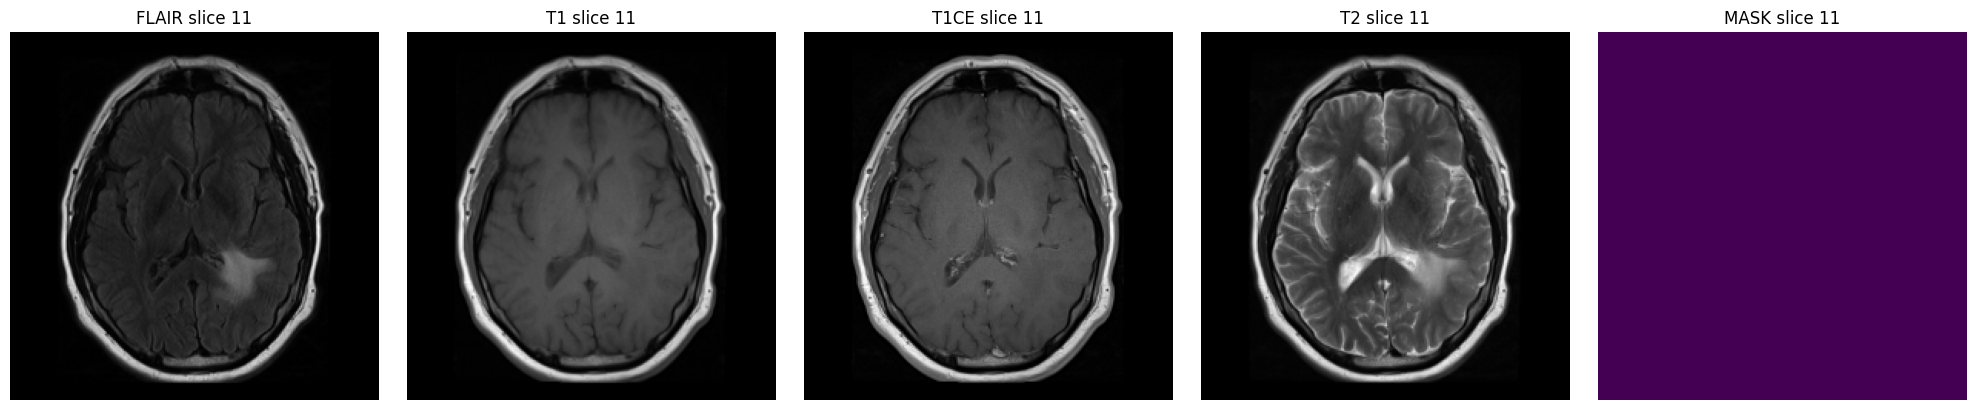

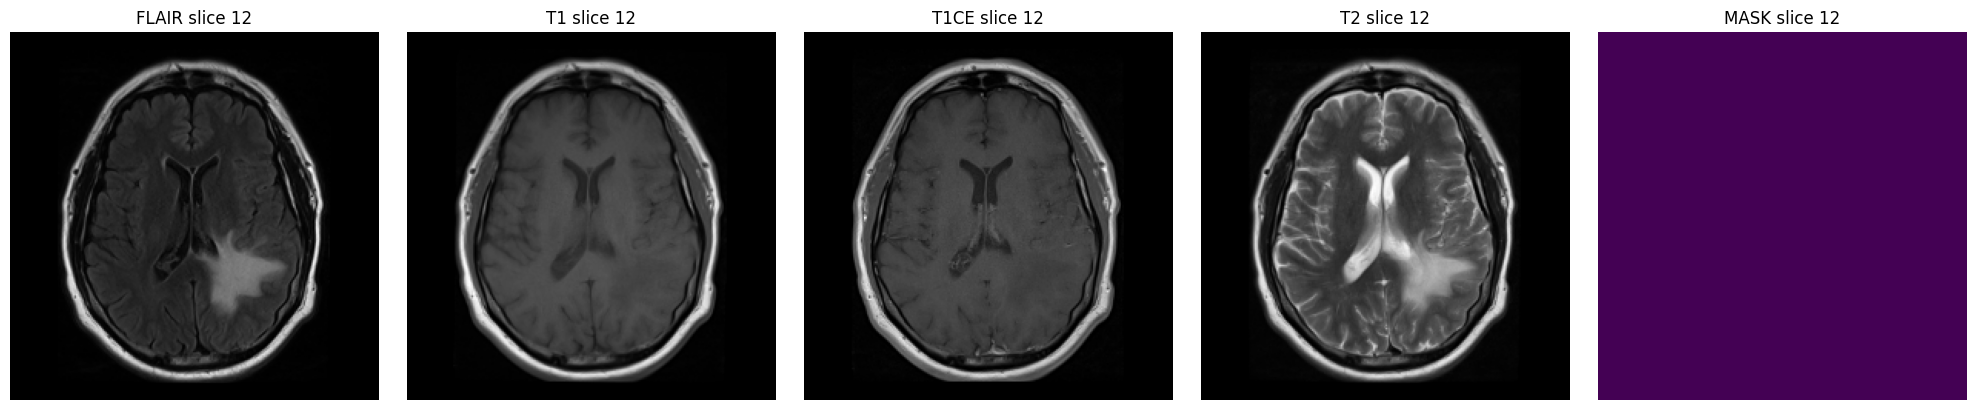

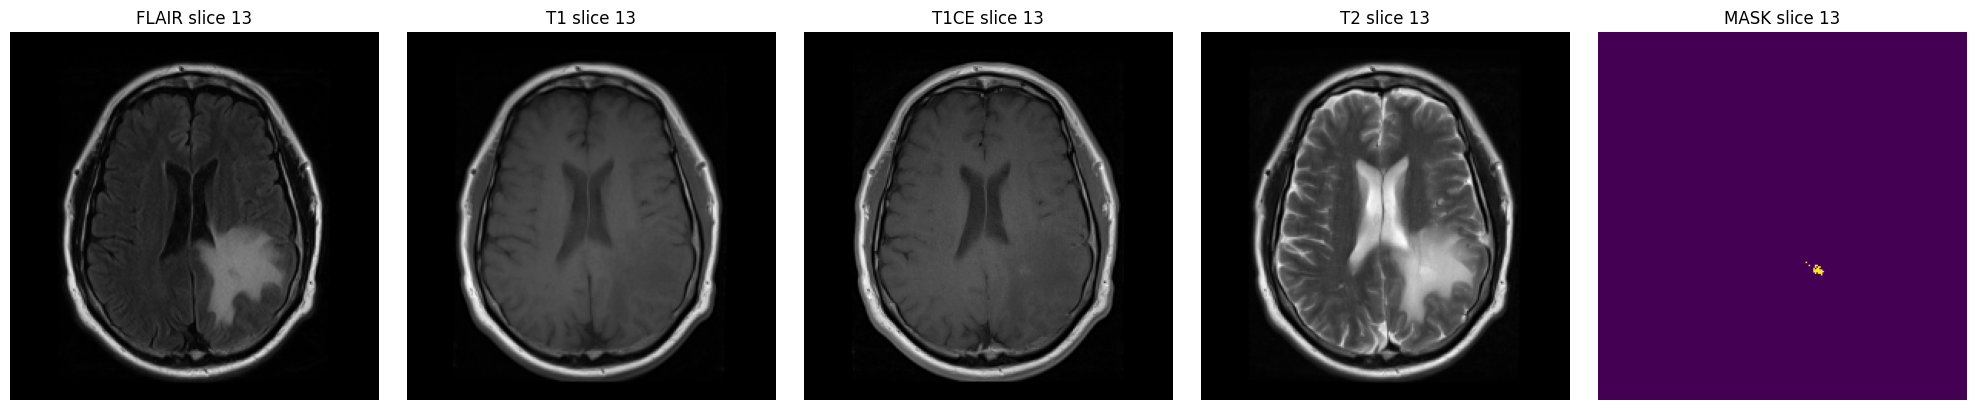

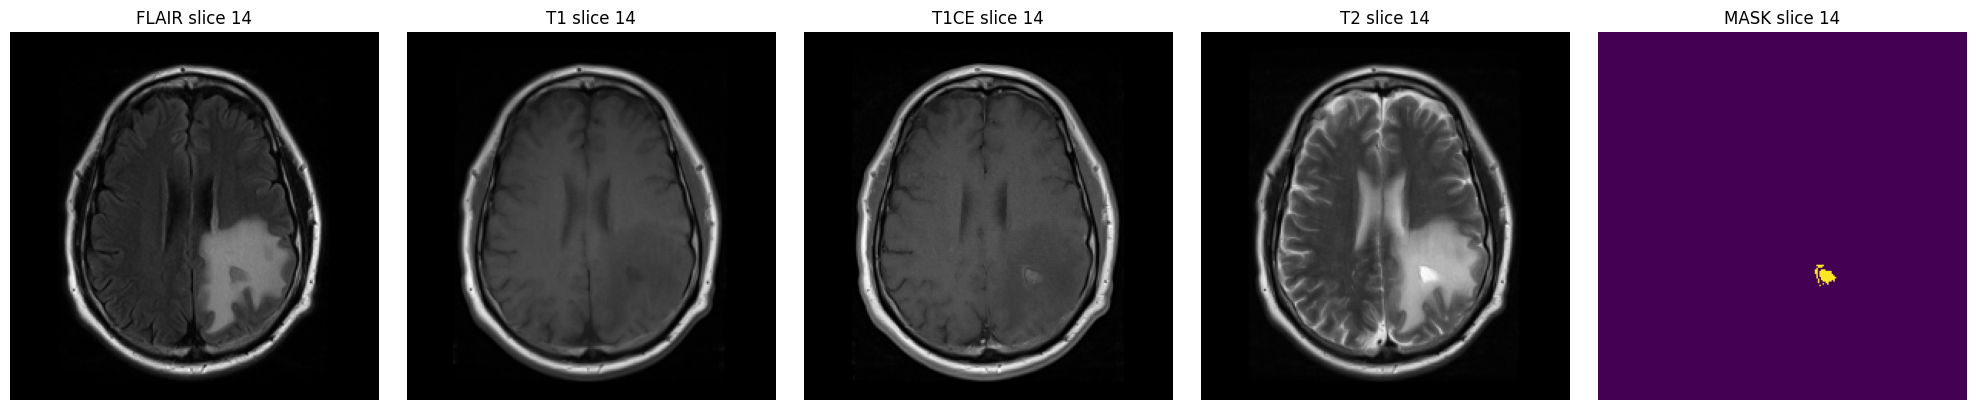

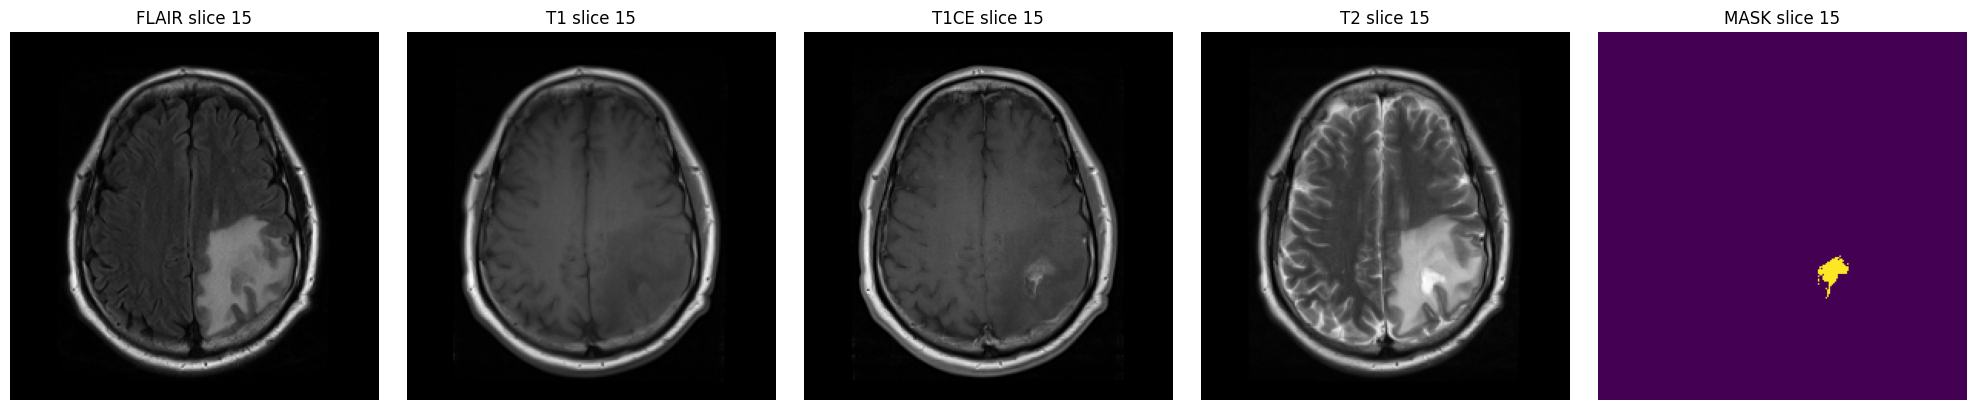

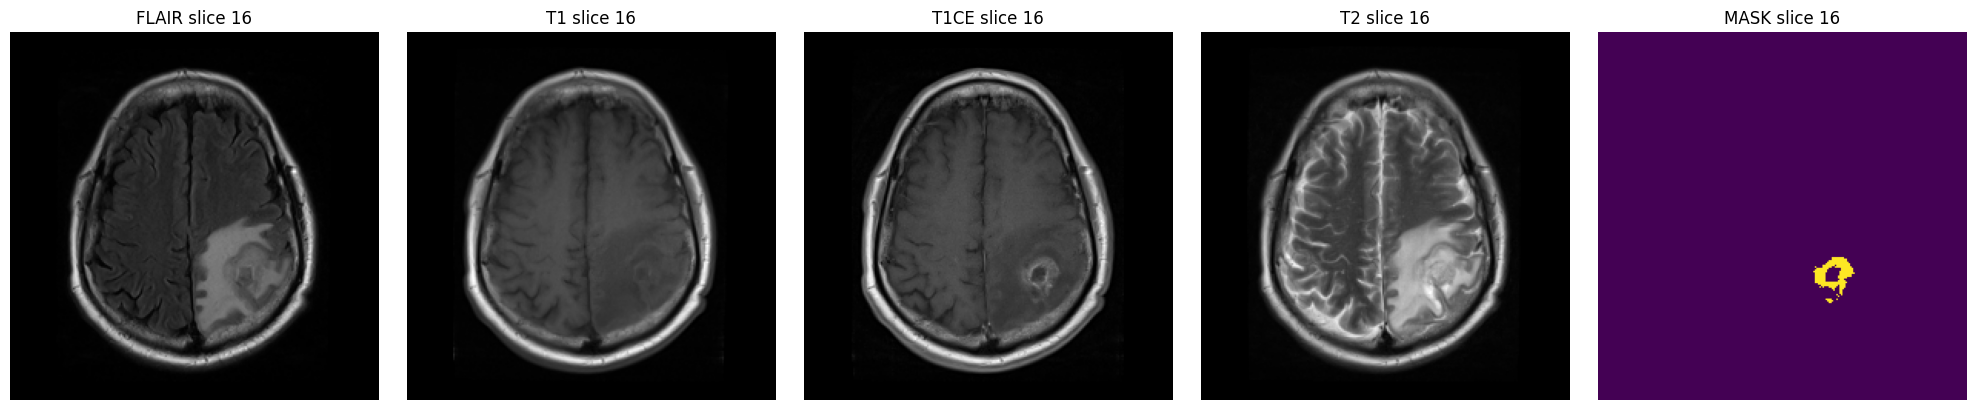

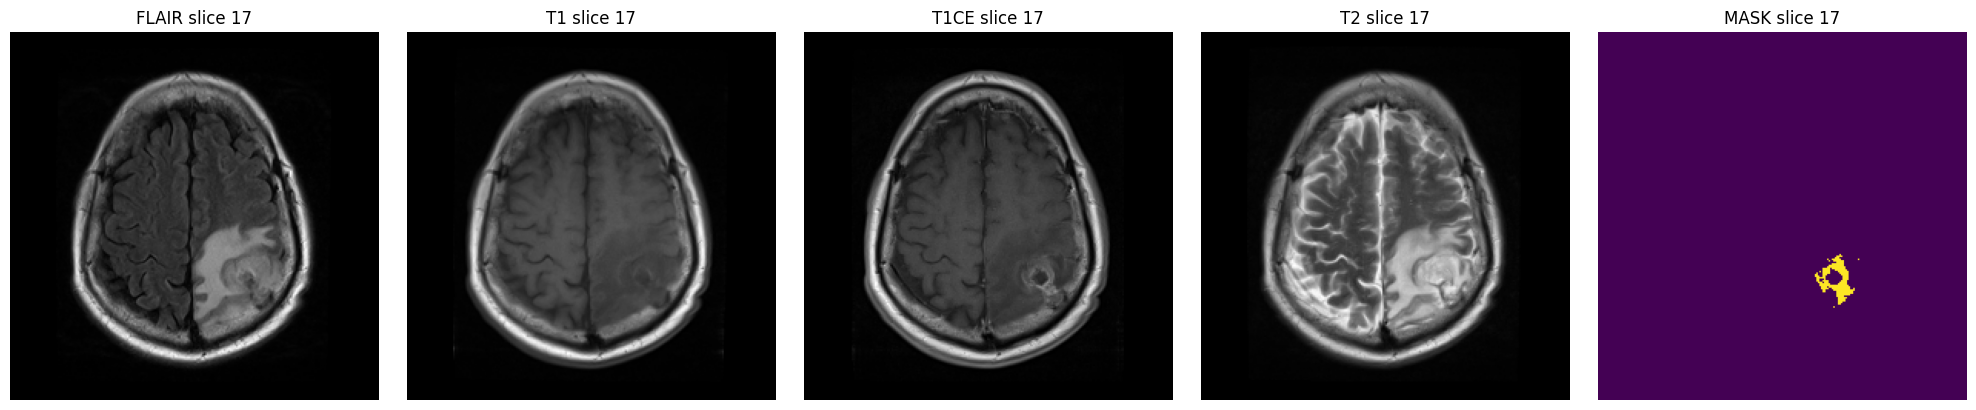

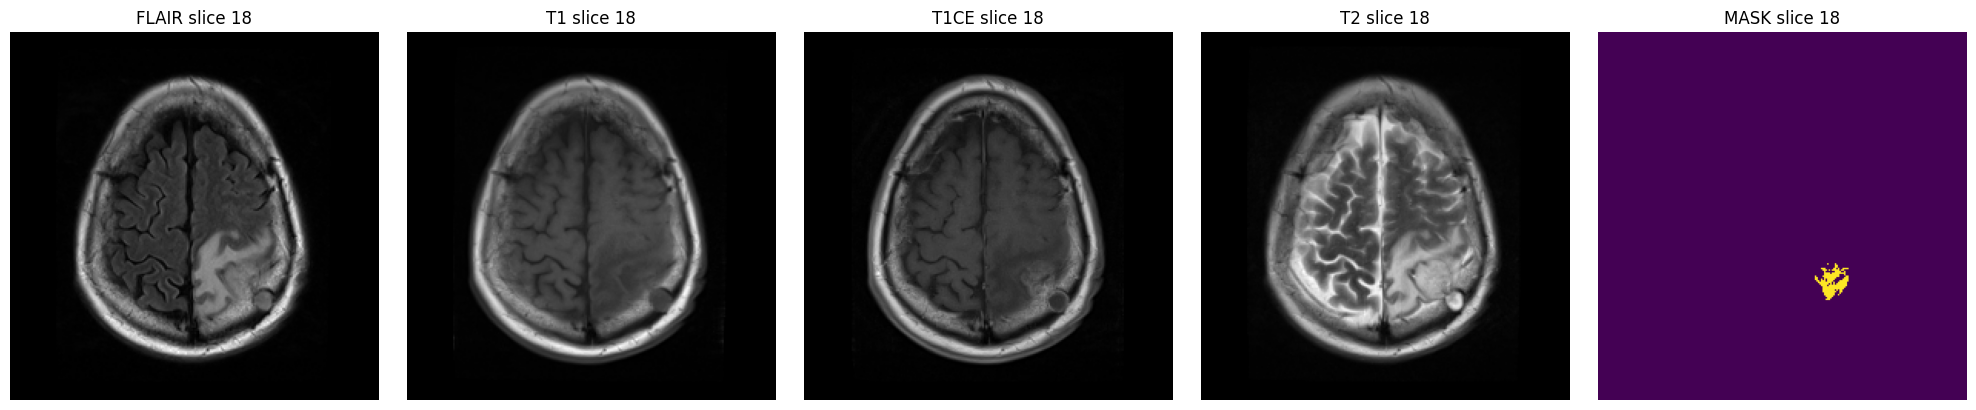

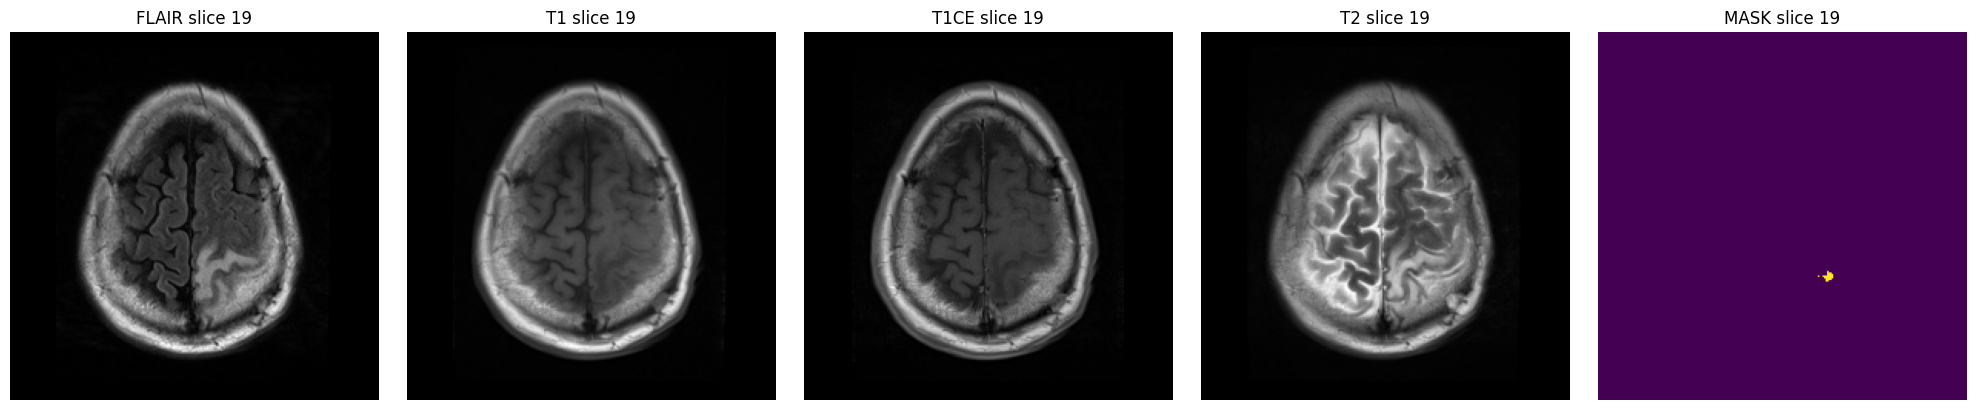

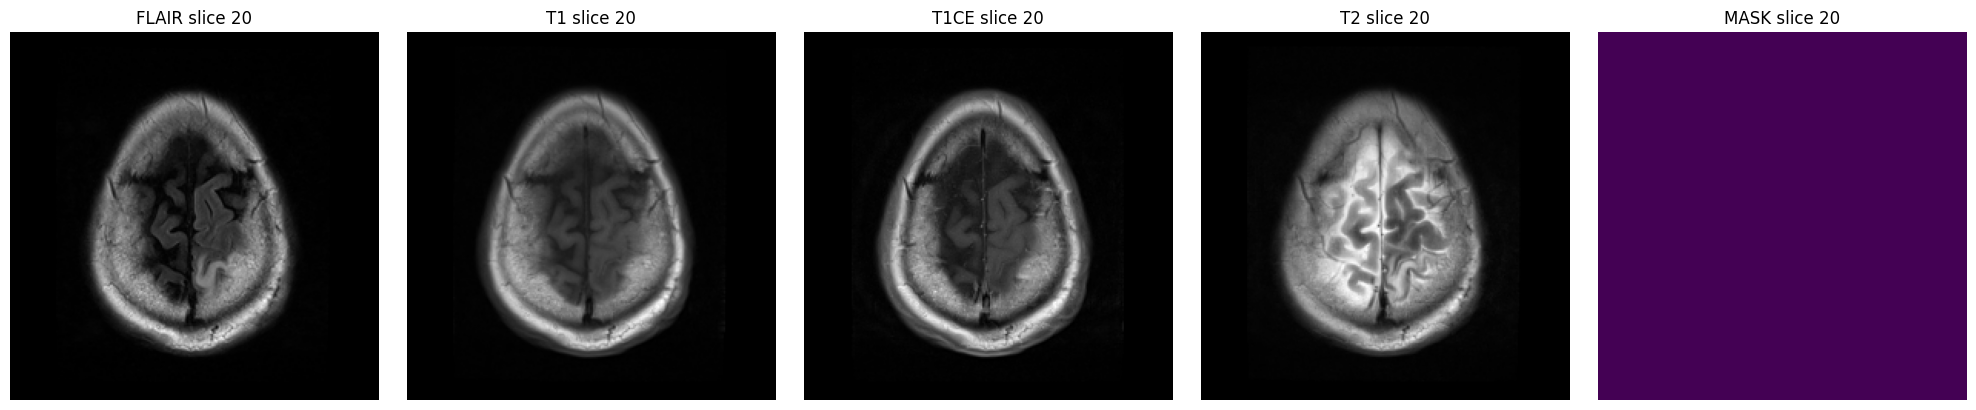

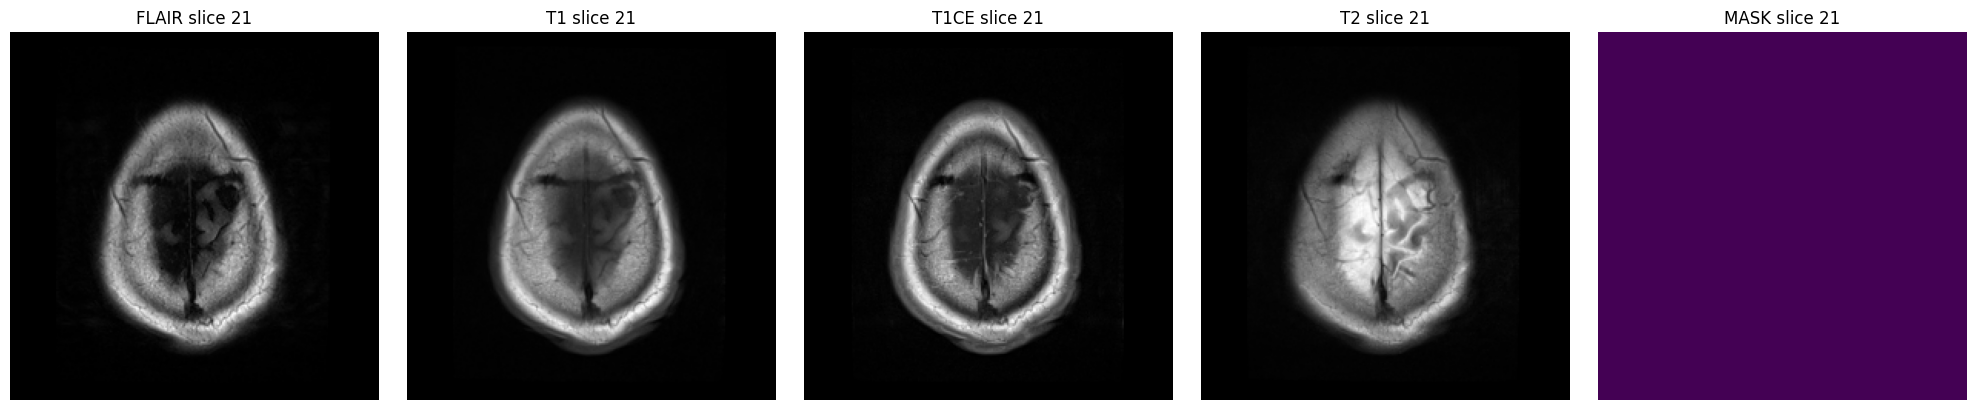

In [3]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_btp_case_all(preproc_root, case_id, date_folder=None, mods=None, pause=0.5):
    """
    Iterate through all axial slices and display each modality side by side.
    preproc_root: path to preprocessed BTP root
    case_id:      case folder name, e.g. "PGBM-001"
    date_folder:  specific session folder, e.g. "1991-11-19"; if None, uses first
    mods:         list of modalities, default ["flair","t1","t1ce","t2","mask"]
    pause:        pause (seconds) between slices
    """
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]

    case_dir = os.path.join(preproc_root, case_id)
    dates = sorted(d for d in os.listdir(case_dir)
                   if os.path.isdir(os.path.join(case_dir, d)))
    if not dates:
        raise RuntimeError(f"No date folders under {case_dir}")
    if date_folder is None:
        date_folder = dates[0]
    if date_folder not in dates:
        raise ValueError(f"{date_folder!r} not in {dates}")

    in_dir = os.path.join(case_dir, date_folder)
    # load volumes once
    vols = {}
    for m in mods:
        path = os.path.join(in_dir, f"{m}.nii.gz")
        vols[m] = nib.load(path).get_fdata()  # (Z, Y, X)

    Z = vols[mods[0]].shape[0]
    for z in range(Z):
        fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods), 4))
        for ax, m in zip(axs, mods):
            slice_img = vols[m][z, :, :]
            ax.imshow(
                slice_img,
                cmap="gray" if m != "mask" else "viridis",
                aspect="equal"
            )
            ax.set_title(f"{m.upper()} slice {z}")
            ax.axis("off")
        plt.tight_layout()
        plt.show()
        plt.pause(pause)
        plt.close(fig)

# ──────────── 사용 예시 ────────────
preproc_root = "../data/btp_preproc_fixed22"
case_id      = "PGBM-001"
show_btp_case_all(preproc_root, case_id,
                  date_folder="1991-11-19",
                  mods=["flair","t1","t1ce","t2","mask"],
                  pause=0.3)
